In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [5]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [6]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [7]:
data.shape

(181, 5)

In [8]:
data=data.dropna()

In [9]:
data.shape

(175, 5)

In [10]:
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [11]:
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)

In [12]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [13]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [14]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
data_scaled=np.array(data_scaled)

In [17]:
Z=linkage(data_scaled,method="ward")

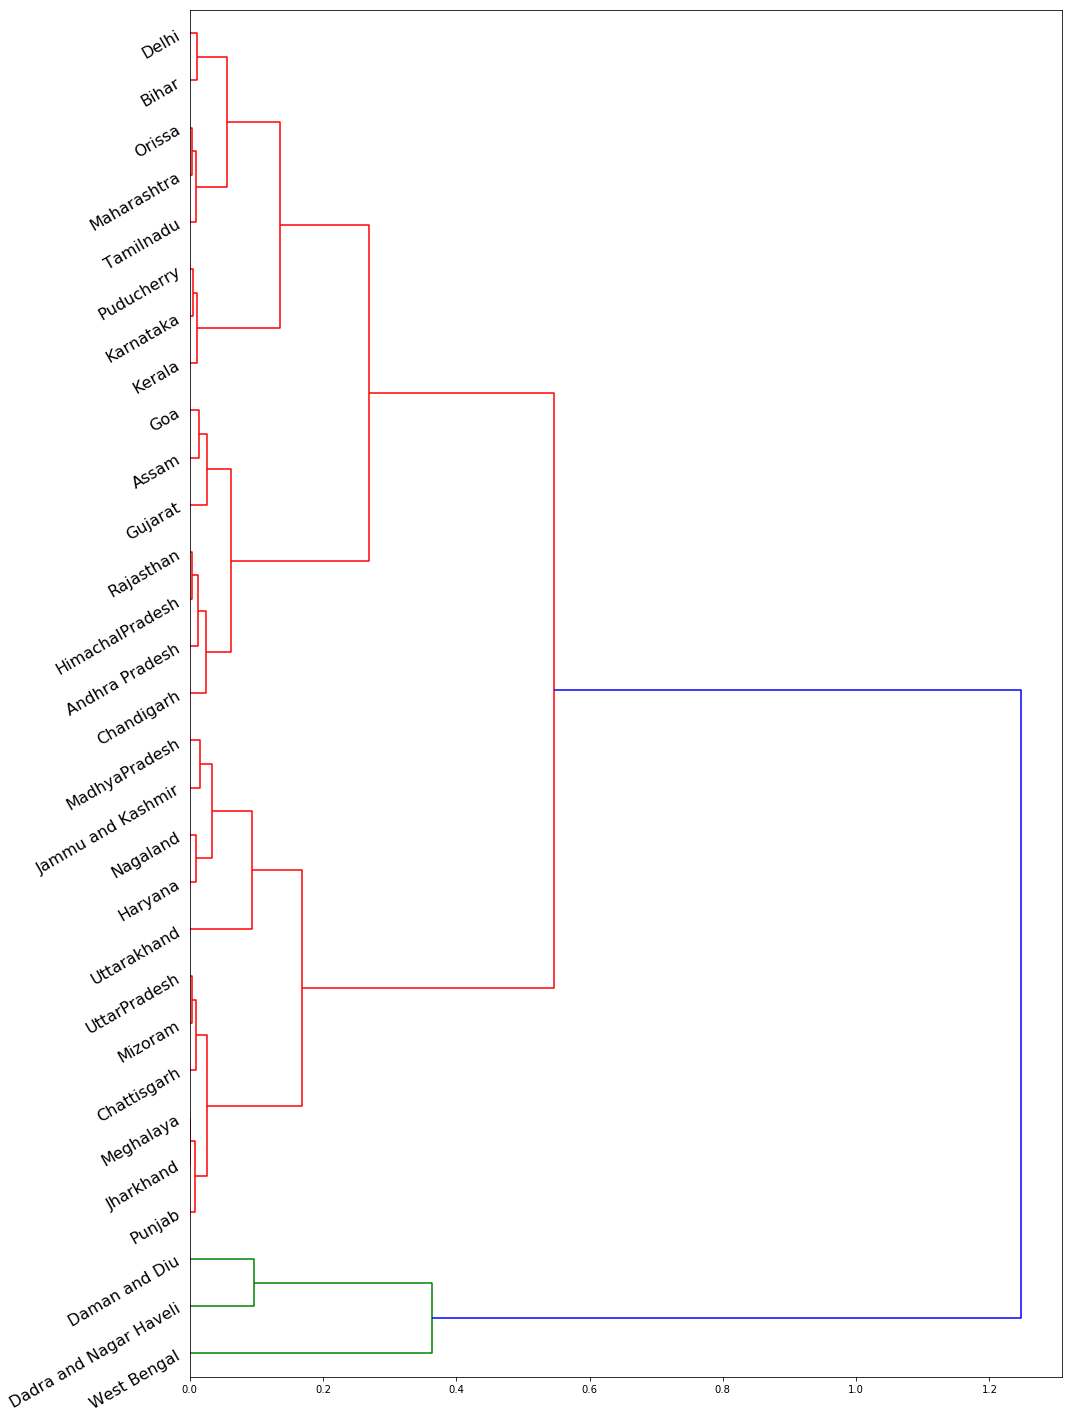

In [17]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()